In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import time
import pymysql

In [2]:
db_conn = pymysql.connect(
    host='localhost',
    user='jupyter_user',
    password='jupyter_pass',
    db='jupyter',
    port=13306,
    charset='utf8',
    cursorclass=pymysql.cursors.DictCursor
)

In [3]:
select_from_animes = '''
  SELECT
    *
  FROM
    animes
'''
pd.read_sql_query(select_from_animes, db_conn).head()

,anime_id,name,genre,type,episodes,rating,members
0,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,8.82,486824
1,5,Cowboy Bebop: Tengoku no Tobira,"Action, Drama, Mystery, Sci-Fi, Space",Movie,1,8.40,137636
2,6,Trigun,"Action, Comedy, Sci-Fi",TV,26,8.32,283069
3,7,Witch Hunter Robin,"Action, Drama, Magic, Mystery, Police, Superna...",TV,26,7.36,64905
4,8,Beet the Vandel Buster,"Adventure, Fantasy, Shounen, Supernatural",TV,52,7.06,9848


In [4]:
select_from_anime_masters = '''
  SELECT
    *
  FROM
    anime_masters
'''

pd.read_sql_query(select_from_anime_masters, db_conn).head()

,anime_id,name,genre,type,episodes,rating,members
0,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,8.82,486824
1,5,Cowboy Bebop: Tengoku no Tobira,"Action, Drama, Mystery, Sci-Fi, Space",Movie,1,8.40,137636
2,6,Trigun,"Action, Comedy, Sci-Fi",TV,26,8.32,283069
3,7,Witch Hunter Robin,"Action, Drama, Magic, Mystery, Police, Superna...",TV,26,7.36,64905
4,8,Beet the Vandel Buster,"Adventure, Fantasy, Shounen, Supernatural",TV,52,7.06,9848


In [5]:
select_from_anime_split_genres = '''
  SELECT
    *
  FROM
    anime_split_genres
'''

pd.read_sql_query(select_from_anime_split_genres, db_conn).head()

,anime_id,name,genre,type,episodes,rating,members
0,20707,"""0""",Music,Music,1,5.06,1170
1,25627,"""Aesop"" no Ohanashi yori: Ushi to Kaeru, Yokub...",Kids,Movie,1,5.00,113
2,7669,"""Bungaku Shoujo"" Kyou no Oyatsu: Hatsukoi",Comedy,OVA,1,7.06,14351
3,7669,"""Bungaku Shoujo"" Kyou no Oyatsu: Hatsukoi",School,OVA,1,7.06,14351
4,7669,"""Bungaku Shoujo"" Kyou no Oyatsu: Hatsukoi",Fantasy,OVA,1,7.06,14351


In [6]:
select_from_anime_genre_top10s = '''
  SELECT
    *
  FROM
    anime_genre_top10s
'''

anime_genre_top10_df = pd.read_sql_query(select_from_anime_genre_top10s, db_conn)

anime_genre_top10_df.head()

,anime_id,name,genre,type,episodes,rating,members
0,7669,"""Bungaku Shoujo"" Kyou no Oyatsu: Hatsukoi",Comedy,OVA,1,7.06,14351
1,7669,"""Bungaku Shoujo"" Kyou no Oyatsu: Hatsukoi",School,OVA,1,7.06,14351
2,7669,"""Bungaku Shoujo"" Kyou no Oyatsu: Hatsukoi",Fantasy,OVA,1,7.06,14351
3,8481,"""Bungaku Shoujo"" Memoire",School,OVA,3,7.54,18013
4,8481,"""Bungaku Shoujo"" Memoire",Drama,OVA,3,7.54,18013


In [7]:
select_from_anime_genre_top10_pivoteds = '''
  SELECT
    *
  FROM
    anime_genre_top10_pivoteds
'''

anime_genre_top10_pivoted_df = pd.read_sql_query(select_from_anime_genre_top10_pivoteds, db_conn)

anime_genre_top10_pivoted_df.head()

,genre,Movie,Music,ONA,OVA,Special,TV
0,Comedy,7293130.0,20860.0,1477270.0,5614760.0,6659290.0,65420900.0
1,Action,10225000.0,77054.0,524907.0,5793680.0,3412690.0,63364000.0
2,Drama,9034100.0,100734.0,188427.0,3043370.0,1915580.0,41011600.0
3,Romance,5245390.0,42811.0,411331.0,3143170.0,2015820.0,40703400.0
4,Supernatural,5452780.0,9189.0,192989.0,2696720.0,2336720.0,38956500.0


In [8]:
select_from_anime_stock_prices = '''
  SELECT
    *
  FROM
    anime_stock_prices
'''

stock_df = pd.read_sql_query(select_from_anime_stock_prices, db_conn, index_col = 'Date', parse_dates=['Date'])

stock_df.head()

,TOEI ANIMATION,IG Port
Date,,
2015-01-01,3356.86,1201.51
2015-01-02,3356.86,1201.51
2015-01-05,3396.12,1218.44
2015-01-06,3361.77,1201.51
2015-01-07,3297.97,1202.51


In [9]:
select_from_anime_stock_returns = '''
  SELECT
    *
  FROM
    anime_stock_returns
'''

anime_stock_returns_df = pd.read_sql_query(select_from_anime_stock_returns, db_conn, index_col = 'Date', parse_dates=['Date'])


anime_stock_returns_df.head()

,TOEI ANIMATION,IG Port
Date,,
2015-01-01,1.000000,1.00000
2015-01-02,1.000000,1.00000
2015-01-05,1.011700,1.01408
2015-01-06,1.001460,1.00000
2015-01-07,0.982457,1.00082


## pandasとは
- ラベル付けされたデータを容易にかつ直感的に扱える用に設計されたパッケージ
- 2つの主要なデータ構造を提供する
  * Series(1次元のデータ)
  * DataFrame(2次元のデータ)
- csv,excel,database,htmlなど、様々なデータを読み込む機能を提供する
- 条件による絞込やDataFrame同士などのjoinといった機能を提供する

### Seriesとは
以下の特徴をもつ
- ラベル(index)を持つ1次元のデータ
- ラベル(index)は重複可能
- ラベル(index) or データを指定した抽出が可能
- ラベル(index)に対してのスライスが可能
- 算術演算可能。
- 統計量を算出するメソッドを持つ

### 以下Seriesの例

In [10]:
# Seriesの実体pandas.Seriesクラス
content = [1,2,3]
label = ['a', 'b', 'c']
series = pd.Series(content, index = label)
series

a    1
b    2
c    3
dtype: int64

In [11]:
# ラベル(index)を指定しない場合は連番がラベル(index)となる
series_no_index = pd.Series([2,4,6,8])
series_no_index

0    2
1    4
2    6
3    8
dtype: int64

In [12]:
# Series#locをつかって、ラベル(index)を指定して取り出すサンプル
series.loc['c']

3

In [13]:
# Series#[]を利用して取得することもできる
series['b']

2

In [14]:
# ラベルを範囲指定で取り出すサンプル
series.loc['b':'c']

b    2
c    3
dtype: int64

In [15]:
# リストを指定して取り出すサンプル
choose_targets= ['a', 'c']
series.loc[choose_targets]

a    1
c    3
dtype: int64

In [16]:
# 特定の位置のデータを取得する　sample
# locではなくilocを利用する
series.iloc[1]

2

In [17]:
# pythonのリストをやタプルと同じようにスライスもできる
series.iloc[1:3]

b    2
c    3
dtype: int64

In [18]:
#  条件を満たすものを抽出するsample(外側にseriesがいて、loc[]の条件をにもseriesがいるのでちょっと気持ち悪い...)
series.loc[ series >= 2]

b    2
c    3
dtype: int64

In [19]:
# まぁ、上記は初見だと気持ち悪いが、series >= 2 がbooleanのSeriesが返ってくるので
# それを使っていると考えると少し気持ち悪さが緩和される
series >= 2

a    False
b     True
c     True
dtype: bool

### DataFrameとは
以下の特徴を持つ

- 行と列にラベル(index)を持った2次元のデータ
- 列ごとに異なる型を持つことができる
- テーブル型のデータに対して読み込み、書き込みができる
- データフレーム同士に

In [20]:
# データフレームをつかってみる(二次元化されたSeriesみたいなやつ)
dataframe = pd.DataFrame(
    [
        [1 ,10, 100],
        [2, 20, 200],
        [3, 30, 300],
    ], 
    index=['r1', 'r2', 'r3'],
    columns=['c1', 'c2', 'c3']  
)

dataframe

,c1,c2,c3
r1,1,10,100
r2,2,20,200
r3,3,30,300


In [21]:
# Seriesと同じ様にラベルを指定ことができる(ただし、行と列の両方を指定する。)
dataframe.loc['r2', 'c2']

20

In [22]:
# 全ての列を指定する様なケース、:を指定する
dataframe.loc['r2', :]

c1      2
c2     20
c3    200
Name: r2, dtype: int64

In [23]:
#  行ラベルをリストで指定、列ラベルをスライスで指定したsample
dataframe.loc[ ['r1', 'r3'], 'c2':'c3' ]

,c2,c3
r1,10,100
r3,30,300


In [24]:
# dataframeに対して比較演算を行うと、真偽値になる
dataframe > 10

,c1,c2,c3
r1,False,False,True
r2,False,True,True
r3,False,True,True


In [25]:
# dataframeから'c2'のように単一で列を取り出すとSeriesとなるが、Seriesに対する比較演算も同じようにできる
dataframe['c2'] > 10

r1    False
r2     True
r3     True
Name: c2, dtype: bool

In [26]:
# ↑のSeriesを真偽値化したものを利用して、c2列の値が10より大きいデータを取得できる
dataframe.loc[ dataframe['c2'] > 10 ]

,c1,c2,c3
r2,2,20,200
r3,3,30,300


In [27]:
# 複合条件を作ることもできる
(dataframe['c1'] < 3) & (dataframe['c3'] < 300)


r1     True
r2     True
r3    False
dtype: bool

In [28]:
# ↑複合条件を利用して、c1列が3より小さく、c3列が300より小さいものを取得できる
dataframe.loc[ (dataframe['c1'] < 3) & (dataframe['c3'] < 300) ]

,c1,c2,c3
r1,1,10,100
r2,2,20,200


In [29]:
# whereメソッドでデータを抽出することもできる(条件にマッチしない行はNaNになる)
dataframe.where(dataframe['c3'] >= 200).head()

,c1,c2,c3
r1,NaN,NaN,NaN
r2,2.0,20.0,200.0
r3,3.0,30.0,300.0


In [30]:
# 欠損値を取り出すのにisnull()が便利
tmp_anime = pd.read_sql_query(select_from_animes, db_conn)
tmp_anime.loc[2:3, 'episodes'] = np.nan # 欠損のあるデータを作成

tmp_anime.loc[tmp_anime['episodes'].isnull()].head()

,anime_id,name,genre,type,episodes,rating,members
2,6,Trigun,"Action, Comedy, Sci-Fi",TV,NaN,8.32,283069
3,7,Witch Hunter Robin,"Action, Drama, Magic, Mystery, Police, Superna...",TV,NaN,7.36,64905


In [31]:
# dropna()を使うと、欠損値があるデータを除外することができる
tmp_anime = pd.read_sql_query(select_from_animes, db_conn)
tmp_anime.loc[2:3, 'episodes'] = np.nan # 欠損のあるデータを作成

tmp_anime.dropna().head()

,anime_id,name,genre,type,episodes,rating,members
0,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26.0,8.82,486824
1,5,Cowboy Bebop: Tengoku no Tobira,"Action, Drama, Mystery, Sci-Fi, Space",Movie,1.0,8.40,137636
4,8,Beet the Vandel Buster,"Adventure, Fantasy, Shounen, Supernatural",TV,52.0,7.06,9848
5,15,Eyeshield 21,"Action, Comedy, Shounen, Sports",TV,145.0,8.08,83648
6,16,Hachimitsu to Clover,"Comedy, Drama, Josei, Romance",TV,24.0,8.18,130646


In [32]:
# 値を代入することもできる
tmp_anime = pd.read_sql_query(select_from_animes, db_conn)
tmp_anime.loc[2, 'episodes'] = np.nan
tmp_anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26.0,8.82,486824
1,5,Cowboy Bebop: Tengoku no Tobira,"Action, Drama, Mystery, Sci-Fi, Space",Movie,1.0,8.40,137636
2,6,Trigun,"Action, Comedy, Sci-Fi",TV,NaN,8.32,283069
3,7,Witch Hunter Robin,"Action, Drama, Magic, Mystery, Police, Superna...",TV,26.0,7.36,64905
4,8,Beet the Vandel Buster,"Adventure, Fantasy, Shounen, Supernatural",TV,52.0,7.06,9848


In [33]:
# 値を、一括で代入することもできる
tmp_anime = pd.read_sql_query(select_from_animes, db_conn)
tmp_anime.loc[tmp_anime['episodes'] == 24, 'episodes'] = np.nan
tmp_anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26.0,8.82,486824
1,5,Cowboy Bebop: Tengoku no Tobira,"Action, Drama, Mystery, Sci-Fi, Space",Movie,1.0,8.40,137636
2,6,Trigun,"Action, Comedy, Sci-Fi",TV,26.0,8.32,283069
3,7,Witch Hunter Robin,"Action, Drama, Magic, Mystery, Police, Superna...",TV,26.0,7.36,64905
4,8,Beet the Vandel Buster,"Adventure, Fantasy, Shounen, Supernatural",TV,52.0,7.06,9848


### さまざまなデータの読み込み
- pandasは、csv,excel,database,htmlなど、様々なデータを読み込む機能を提供する
- csvなどを読み込むと、DataFrameとして読み込む
- 読み込み時にDataFrameのインデックスをどれにするか指定することができる
- 指定した列を指定した型で読み込むことができる

以下、データの読み込み例

In [34]:
# csvからデータを取得する
anime_master_dataframe = pd.read_csv( '../sample_data/anime.csv')
anime_master_dataframe.head()


,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [35]:
# インデックスにする列を番号で指定することができる
anime_master_dataframe = pd.read_csv( '../sample_data/anime.csv')
anime_master_dataframe.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [36]:
# インデックスにする列を列名で指定することもできる
anime_master_dataframe = pd.read_csv('../sample_data/anime.csv', index_col='anime_id')
anime_master_dataframe.head()

,name,genre,type,episodes,rating,members
anime_id,,,,,,
32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [37]:
# 指定した列を指定した型で読み込むことができる
anime_master_dataframe = pd.read_csv('../sample_data/anime.csv', dtype={'members': float})
anime_master_dataframe.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630.0
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665.0
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262.0
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572.0
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266.0


In [38]:
# datetime型への変換は、dtypeではなく、parse_datesで指定する
anime_stock_price_dataframe = pd.read_csv('../sample_data/anime_stock_price.csv', parse_dates=['Date'])
anime_stock_price_dataframe.dtypes

Date              datetime64[ns]
TOEI ANIMATION           float64
IG Port                  float64
dtype: object

In [39]:
# separatorを指定することでtsvを読み込むことが可能
anime_tsv = '../sample_data/anime.tsv'

tmp_anime_master_dataframe = pd.read_csv(anime_tsv, sep="\t")
tmp_anime_master_dataframe.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,Drama\t Romance\t School\t Supernatural,Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,Action\t Adventure\t Drama\t Fantasy\t Magic\t...,TV,64,9.26,793665
2,28977,Gintama°,Action\t Comedy\t Historical\t Parody\t Samura...,TV,51,9.25,114262
3,9253,Steins;Gate,Sci-Fi\t Thriller,TV,24,9.17,673572
4,9969,Gintama&#039;,Action\t Comedy\t Historical\t Parody\t Samura...,TV,51,9.16,151266


In [40]:
# sort_valuesを利用することでsortがすることが可能
# ascending=Falseで降順
anime_master_dataframe = pd.read_sql_query(select_from_anime_masters, db_conn)
anime_master_dataframe.sort_values('rating', ascending=False).head()

,anime_id,name,genre,type,episodes,rating,members
9914,33662,Taka no Tsume 8: Yoshida-kun no X-Files,"Comedy, Parody",Movie,1,10.00,13
7276,23005,Mogura no Motoro,Slice of Life,Movie,1,9.50,62
9430,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
9909,33607,Kahei no Umi,Historical,Movie,1,9.33,44
3188,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665


In [41]:
# sort_valuesを利用することでsortがすることが可能
# ascending=Trueで昇順(Default)
anime_master_dataframe.sort_values('rating', ascending=True).head()

,anime_id,name,genre,type,episodes,rating,members
10070,34476,Platonic Chain: Ansatsu Jikkouchuu,"Sci-Fi, Slice of Life",Special,1,1.67,51
2457,3287,Tenkuu Danzai Skelter+Heaven,"Mecha, Sci-Fi",OVA,1,2.00,7680
5639,13405,Utsu Musume Sayuri,"Comedy, Dementia",OVA,1,2.14,4047
333,413,Hametsu no Mars,"Horror, Sci-Fi",OVA,1,2.37,27557
5815,14781,Roboteuwang Sseonsyakeu,"Action, Mecha, Sci-Fi",Movie,1,2.49,121


In [42]:
# mapを使うことでSeriesごとに関数を適用することができる
# 下記は、 ratingにnumpyのsquareを適用した場合
anime_master_dataframe['rating'].map(np.square).head()

0    77.7924
1    70.5600
2    69.2224
3    54.1696
4    49.8436
Name: rating, dtype: float64

In [43]:
# mapを使うことでSeriesごとに関数を適用することができる
# name自身のupperを適用するような場合はlambdaが便利
anime_master_dataframe['name'].map(lambda name: name.upper()).head()

0                       COWBOY BEBOP
1    COWBOY BEBOP: TENGOKU NO TOBIRA
2                             TRIGUN
3                 WITCH HUNTER ROBIN
4             BEET THE VANDEL BUSTER
Name: name, dtype: object

In [44]:
# applyを使うことでDataframeの各列に対して関数を適用することができる
anime_master_dataframe.apply(len)

anime_id    10075
name        10075
genre       10075
type        10075
episodes    10075
rating      10075
members     10075
dtype: int64

In [45]:
# axisに1を指定することでDataframeの行に対して関数を適用することができる
anime_master_dataframe.apply(type, axis=1).head()

0    <class 'pandas.core.series.Series'>
1    <class 'pandas.core.series.Series'>
2    <class 'pandas.core.series.Series'>
3    <class 'pandas.core.series.Series'>
4    <class 'pandas.core.series.Series'>
dtype: object

In [46]:
# axisに1を指定することでDataframeの行に対して関数を適用することができる
# 渡した関数が呼び出される引数は、Seriesになるので、Seriresを使った処理もできる。
anime_master_dataframe.apply(lambda r: r['genre'].upper() + r['name'].lower(), axis=1).head()

0    ACTION, ADVENTURE, COMEDY, DRAMA, SCI-FI, SPAC...
1    ACTION, DRAMA, MYSTERY, SCI-FI, SPACEcowboy be...
2                         ACTION, COMEDY, SCI-FItrigun
3    ACTION, DRAMA, MAGIC, MYSTERY, POLICE, SUPERNA...
4    ADVENTURE, FANTASY, SHOUNEN, SUPERNATURALbeet ...
dtype: object

In [47]:
# applymapを使うと、DataFrameの各値に対して関数を適用することができる
anime_master_dataframe[['name','genre']].applymap(len).head()

,name,genre
0,12,47
1,31,37
2,6,22
3,18,51
4,22,41


In [48]:
anime_master_dataframe.apply(lambda r: r['type'].upper(), axis=1).head()

0       TV
1    MOVIE
2       TV
3       TV
4       TV
dtype: object

### Dataframe・Seriesには、たくさんの統計的メソッドが用意されている

例：

|  # | メソッド | 説明 |
| -- | -------- | ---- |
| 1  | count()  | 欠損を除外したデータ数     |
| 2  | sum      | 合計値 |
| 3  | mean     | 平均値 |
| 4  | median   | 中央値 |
| 5  | min      | 最小値 |
| 6  | max      | 最大値 |
| 7  | std      | 標準偏差 |
| 8  | var      | 分散 |
| 9  | skew     | 歪度(3次のモーメント) |
| 10 | kurt     | 尖度(4次のモーメント) |
| 11 | quantile | 分位数(パーセンタイル値) |
| 12 | cov      | 共分散 |
| 13 | corr     | 相関 |

describe()を呼び出すことで、基本統計量を算出することができる。

In [49]:
# DataFrameには、mean()を始めとして様々な統計的メソッドが用意されている
anime_master_dataframe.mean()


anime_id    14055.982035
episodes       13.939156
rating          6.507956
members     18924.950769
dtype: float64

In [50]:
# Seriesにも同様に、様々な統計的メソッドが用意されている
members = anime_master_dataframe['members']
members.sum()


190668879

In [51]:
members.mean()

18924.95076923077

In [52]:
members.min()

12

In [53]:
members.max()

1013917

In [54]:
members.std()

57117.51313952969

In [55]:
members.skew()

6.5882896582071631

In [56]:
members.kurt()

60.726648079672003

In [57]:
members.quantile()

1227.0

In [58]:
members.cov(anime_master_dataframe['rating'])

23535.092927966893

In [59]:
members.corr(anime_master_dataframe['rating'])

0.38974688712399908

In [60]:
# describe()を呼び出すことで基本的な統計量を算出できる
# 下記 lambda部分は、見やすくするために小数点以下四捨五入している
# describe()を単純に呼び出した場合は、自動的に数値型の列が対象となる
anime_master_dataframe.describe().apply(lambda x: x.round(1))

,anime_id,episodes,rating,members
count,10075.0,10075.0,10075.0,10075.0
mean,14056.0,13.9,6.5,18925.0
std,11294.9,50.8,1.1,57117.5
min,1.0,1.0,1.7,12.0
25%,3431.0,1.0,5.9,177.0
50%,10526.0,1.0,6.6,1227.0
75%,24438.0,13.0,7.3,10254.0
max,34519.0,1818.0,10.0,1013917.0


In [61]:
# describe()の引数でパーセンタイルを変更することもできる
anime_master_dataframe.describe(percentiles=[0.1,0.9]).apply(lambda x: x.round(1))

,anime_id,episodes,rating,members
count,10075.0,10075.0,10075.0,10075.0
mean,14056.0,13.9,6.5,18925.0
std,11294.9,50.8,1.1,57117.5
min,1.0,1.0,1.7,12.0
10%,1259.4,1.0,5.1,74.0
50%,10526.0,1.0,6.6,1227.0
90%,31190.0,37.0,7.8,47587.6
max,34519.0,1818.0,10.0,1013917.0


In [62]:
# 数値の存在しないdataframeの場合は、count,unique,top,freqが基本統計量となる
anime_master_dataframe[['type','genre']].describe()

,type,genre
count,10075,10075
unique,6,2735
top,TV,Comedy
freq,3330,500


### クロス集計を行う

### 事前知識
- DataFrame#groupbyでデータを集約することができる
- DataFrame#pivot_tableでも同様のことができる

### クロス集計する手順
1. 集約したい値のマスタを用意する
2. 1.のデータを抽出する
3. 2.を結合する

In [63]:
# groupby()を呼び出すことでデータを集約することができる
grouped = anime_master_dataframe.groupby('type')
type(grouped)

pandas.core.groupby.DataFrameGroupBy

In [64]:
# 集約したデータの平均値を出してみる
grouped.mean().apply(lambda x: x.round(1))

,anime_id,episodes,rating,members
type,,,,
Movie,14322.5,1.1,6.3,10654.0
Music,22495.1,1.1,5.6,1273.0
ONA,22738.0,6.8,5.6,4401.8
OVA,12207.7,2.5,6.5,6849.5
Special,16802.3,2.5,6.5,7424.6
TV,10929.6,37.5,6.9,41832.3


In [65]:
# 主役したデータの基本統計量を出してみる
grouped.describe().apply(lambda x: x.round(1))

anime_id  episodes    members  rating
type                                                
Movie   count    2220.0    2220.0     2220.0  2220.0
        mean    14322.5       1.1    10654.0     6.3
        std     10925.7       2.2    31603.6     1.2
        min         5.0       1.0       13.0     2.5
        25%      4396.8       1.0      119.0     5.4
        50%     10677.5       1.0      489.5     6.5
        75%     24071.5       1.0     4239.0     7.3
        max     34201.0     100.0   466254.0    10.0
Music   count     485.0     485.0      485.0   485.0
        mean    22495.1       1.1     1273.0     5.6
        std     10175.0       1.3     4489.0     1.0
        min       731.0       1.0       24.0     3.3
        25%     12101.0       1.0       97.0     5.0
        50%     24903.0       1.0      226.0     5.6
        75%     31925.0       1.0      797.0     6.2
        max     34412.0      24.0    71136.0     8.4
ONA     count     591.0     591.0      591.0   591.0
        mean    22738.0       6.8     4401.8     5.6
        std     10346.0      11.5    12994.9     1.1
        min       574.0       1.0       25.0     2.7
        25%     13467.0       1.0      108.5     4.9
        50%     25241.0       2.0      336.0     5.7
        75%     32287.5       8.0     1890.5     6.4
        max     34514.0      84.0   144898.0     8.3
OVA     count    1932.0    1932.0     1932.0  1932.0
        mean    12207.7       2.5     6849.5     6.5
        std     10718.7       3.9    17479.7     0.9
        min        44.0       1.0       17.0     2.0
        25%      2297.2       1.0      122.0     5.9
        50%      8965.5       1.0     1027.0     6.5
        75%     22459.5       3.0     5706.0     7.1
        max     34349.0     110.0   305165.0     9.2
Special count    1517.0    1517.0     1517.0  1517.0
        mean    16802.3       2.5     7424.6     6.5
        std     10838.8       3.8    15666.1     0.9
        min       191.0       1.0       24.0     1.7
        25%      6877.0       1.0      298.0     6.1
        50%     15815.0       1.0     1906.0     6.6
        75%     27821.0       2.0     6978.0     7.1
        max     34519.0      51.0   160423.0     8.7
TV      count    3330.0    3330.0     3330.0  3330.0
        mean    10929.6      37.5    41832.3     6.9
        std     10645.4      83.3    89925.6     0.8
        min         1.0       3.0       12.0     3.0
        25%      2112.2      13.0      443.0     6.5
        50%      6511.5      25.0     5617.0     7.0
        75%     18938.5      43.0    41568.2     7.5
        max     34503.0    1818.0  1013917.0     9.3

In [66]:
# 複数の要素でグルーピングすることも可能
anime_master_dataframe.groupby(['type','genre']).mean().round(1)

anime_id  episodes  \
type  genre                                                                    
Movie Action                                                8497.9       1.0   
      Action, Adventure                                    10996.8       1.0   
      Action, Adventure, Cars, Comedy, Sci-Fi, Shounen       378.0       1.0   
      Action, Adventure, Cars, Sci-Fi                       6162.0       1.0   
      Action, Adventure, Comedy                            23679.5       1.0   
      Action, Adventure, Comedy, Demons, Fantasy, Mar...     903.0       1.0   
      Action, Adventure, Comedy, Drama                     30115.3       1.0   
      Action, Adventure, Comedy, Drama, Fantasy, Kids       4668.4       1.0   
      Action, Adventure, Comedy, Drama, Fantasy, Magi...    9135.0       1.0   
      Action, Adventure, Comedy, Drama, Fantasy, Shounen   16168.0       1.0   
      Action, Adventure, Comedy, Drama, Historical, M...     416.0       1.0   
      Action, Adventure, Comedy, Drama, Mecha, Music,...    1400.0       1.0   
      Action, Adventure, Comedy, Drama, Mecha, Sci-Fi...    1626.0       1.0   
      Action, Adventure, Comedy, Drama, Romance, Sci-Fi     1922.5       1.0   
      Action, Adventure, Comedy, Drama, Sci-Fi, Shounen     2408.0       1.0   
      Action, Adventure, Comedy, Drama, Seinen             23293.0       1.0   
      Action, Adventure, Comedy, Fantasy, Kids             16680.0       1.0   
      Action, Adventure, Comedy, Fantasy, Kids, Parod...    8490.0       1.0   
      Action, Adventure, Comedy, Fantasy, Kids, Sci-Fi      1122.0       1.0   
      Action, Adventure, Comedy, Fantasy, Magic, Shounen   12049.0       1.0   
      Action, Adventure, Comedy, Fantasy, Martial Art...   13146.5       1.0   
      Action, Adventure, Comedy, Fantasy, Parody           33195.0       1.0   
      Action, Adventure, Comedy, Fantasy, Sci-Fi, Sho...     892.0       1.0   
      Action, Adventure, Comedy, Fantasy, Shounen           6769.5       1.0   
      Action, Adventure, Comedy, Fantasy, Shounen, Su...     950.7       1.0   
      Action, Adventure, Comedy, Historical, Martial ...    2851.0       1.0   
      Action, Adventure, Comedy, Martial Arts, Shoune...    1010.0       1.0   
      Action, Adventure, Comedy, Mecha, Sci-Fi, Super...     212.0       1.0   
      Action, Adventure, Comedy, Mystery, Shounen           1435.0       1.0   
      Action, Adventure, Comedy, Sci-Fi, Shounen, Sports    1670.0       1.0   
...                                                            ...       ...   
TV    Romance, Slice of Life                               19387.5      87.0   
      Romance, Slice of Life, Supernatural                 23079.0      13.0   
      Romance, Sports                                      11919.0      52.0   
      School                                               17845.0      31.0   
      School, Sci-Fi                                       30383.0      13.0   
      School, Seinen, Sports                               31588.0      25.0   
      School, Shoujo, Shoujo Ai, Slice of Life              3750.0      13.0   
      School, Shounen, Sports                              16338.5      31.5   
      School, Slice of Life                                24855.0      12.0   
      School, Slice of Life, Supernatural                  12119.0      12.0   
      School, Sports                                       32483.0      12.0   
      Sci-Fi                                                8137.4      70.0   
      Sci-Fi, Shounen                                       3751.7      47.0   
      Sci-Fi, Shounen, Sports                               2758.0      52.0   
      Sci-Fi, Slice of Life                                  868.5      18.5   
      Sci-Fi, Space                                        12836.7      27.7   
      Sci-Fi, Sports                                        3433.0      32.0   
      Sci-Fi, Thriller                                    

In [67]:
# groupby()と同様の処理をpivot_table()を利用して算出することも可能
anime_master_dataframe.pivot_table(index='type', aggfunc=np.mean)

,anime_id,episodes,members,rating
type,,,,
Movie,14322.477928,1.100901,10654.022072,6.328599
Music,22495.111340,1.125773,1273.028866,5.583918
ONA,22738.000000,6.778342,4401.822335,5.629628
OVA,12207.692547,2.549689,6849.526398,6.475217
Special,16802.341463,2.495715,7424.628873,6.525577
TV,10929.554655,37.456156,41832.314414,6.928961


In [68]:
# groupby()と同様の処理をpivot_table()を利用して算出することも可能
anime_master_dataframe.pivot_table(index=['type','genre'], aggfunc=np.mean)

anime_id  \
type  genre                                                              
Movie Action                                               8497.944444   
      Action, Adventure                                   10996.750000   
      Action, Adventure, Cars, Comedy, Sci-Fi, Shounen      378.000000   
      Action, Adventure, Cars, Sci-Fi                      6162.000000   
      Action, Adventure, Comedy                           23679.500000   
      Action, Adventure, Comedy, Demons, Fantasy, Mar...    903.000000   
      Action, Adventure, Comedy, Drama                    30115.333333   
      Action, Adventure, Comedy, Drama, Fantasy, Kids      4668.400000   
      Action, Adventure, Comedy, Drama, Fantasy, Magi...   9135.000000   
      Action, Adventure, Comedy, Drama, Fantasy, Shounen  16168.000000   
      Action, Adventure, Comedy, Drama, Historical, M...    416.000000   
      Action, Adventure, Comedy, Drama, Mecha, Music,...   1400.000000   
      Action, Adventure, Comedy, Drama, Mecha, Sci-Fi...   1626.000000   
      Action, Adventure, Comedy, Drama, Romance, Sci-Fi    1922.500000   
      Action, Adventure, Comedy, Drama, Sci-Fi, Shounen    2408.000000   
      Action, Adventure, Comedy, Drama, Seinen            23293.000000   
      Action, Adventure, Comedy, Fantasy, Kids            16680.000000   
      Action, Adventure, Comedy, Fantasy, Kids, Parod...   8490.000000   
      Action, Adventure, Comedy, Fantasy, Kids, Sci-Fi     1122.000000   
      Action, Adventure, Comedy, Fantasy, Magic, Shounen  12049.000000   
      Action, Adventure, Comedy, Fantasy, Martial Art...  13146.500000   
      Action, Adventure, Comedy, Fantasy, Parody          33195.000000   
      Action, Adventure, Comedy, Fantasy, Sci-Fi, Sho...    892.000000   
      Action, Adventure, Comedy, Fantasy, Shounen          6769.500000   
      Action, Adventure, Comedy, Fantasy, Shounen, Su...    950.714286   
      Action, Adventure, Comedy, Historical, Martial ...   2851.000000   
      Action, Adventure, Comedy, Martial Arts, Shoune...   1010.000000   
      Action, Adventure, Comedy, Mecha, Sci-Fi, Super...    212.000000   
      Action, Adventure, Comedy, Mystery, Shounen          1435.000000   
      Action, Adventure, Comedy, Sci-Fi, Shounen, Sports   1670.000000   
...                                                                ...   
TV    Romance, Slice of Life                              19387.500000   
      Romance, Slice of Life, Supernatural                23079.000000   
      Romance, Sports                                     11919.000000   
      School                                              17845.000000   
      School, Sci-Fi                                      30383.000000   
      School, Seinen, Sports                              31588.000000   
      School, Shoujo, Shoujo Ai, Slice of Life             3750.000000   
      School, Shounen, Sports                             16338.500000   
      School, Slice of Life                               24855.000000   
      School, Slice of Life, Supernatural                 12119.000000   
      School, Sports                                      32483.000000   
      Sci-Fi                                               8137.400000   
      Sci-Fi, Shounen                                      3751.666667   
      Sci-Fi, Shounen, Sports                              2758.000000   
      Sci-Fi, Slice of Life                                 868.500000   
      Sci-Fi, Space                                       12836.666667   
      Sci-Fi, Sports                                       3433.000000   
      Sci-Fi, Thriller                                     9253.000000   
      Seinen, Slice of Life                               31107.000000   
      Seinen, Slice of Life, Supernatural                 18411.000000   
      Seinen, Sports                                      22831.000000   
      Shoujo                                              30705.00

In [69]:
### クロス集計する手順
# TODO: とりあえず写経して見たけど、何やっているか意味不明だった。。。

# 1. 集約したい値のマスタを用意する
genres = anime_master_dataframe['genre'].map(lambda x: x.split(','))
ser = pd.Series(np.hstack(genres.values))# numpy.arrayにして2次元から1次元のデータに変換

# 2. 1.のデータを抽出する
unique_genres = ser.str.strip().unique()
unique_genres.sort()
unique_genres

# 3. 2.を結合する
def filter_df_by_genre(df, genre):
    genre_df = df.loc[df['genre'].map(lambda x: genre in x)].copy()
    genre_df['genre'] = genre
    return genre_df

genre_df_list = [filter_df_by_genre(anime_master_dataframe, genre) for genre in unique_genres]
df2 = pd.concat(genre_df_list)
df2.sort_values('name', inplace=True)

top10 = df2.groupby('genre')['members'].sum().sort_values(ascending=False).index[:10]
df2 = df2[df2['genre'].isin(top10)]

df2.loc[df2['name'] == 'Kimi no Na wa.']

,anime_id,name,genre,type,episodes,rating,members
9430,32281,Kimi no Na wa.,Supernatural,Movie,1,9.37,200630
9430,32281,Kimi no Na wa.,Romance,Movie,1,9.37,200630
9430,32281,Kimi no Na wa.,Drama,Movie,1,9.37,200630
9430,32281,Kimi no Na wa.,School,Movie,1,9.37,200630


In [70]:
df2.pivot_table(index='genre',columns='type',values=['members'],aggfunc=np.sum).head()

members                                                       
type            Movie     Music        ONA        OVA    Special          TV
genre                                                                       
Action     10224960.0   77054.0   524907.0  5793680.0  3412689.0  63364032.0
Adventure   9485223.0   42829.0    70431.0  2373765.0  2052024.0  27529975.0
Comedy      7293127.0   20860.0  1477266.0  5614758.0  6659293.0  65420862.0
Drama       9034099.0  100734.0   188427.0  3043374.0  1915578.0  41011557.0
Fantasy     8019406.0   43962.0   188937.0  2754224.0  2504131.0  34932563.0

### 時系列データの処理
pandasでは時系列データを扱うこともできる

- pct_change()を使用することで1つ前の値からの変化率を算出する
- cumprod()を用いることで、累積積を算出する
- DatetimeIndexというIndexを利用することでdatetime型の時系列処理を便利にできる


In [71]:
stock_df.head()

,TOEI ANIMATION,IG Port
Date,,
2015-01-01,3356.86,1201.51
2015-01-02,3356.86,1201.51
2015-01-05,3396.12,1218.44
2015-01-06,3361.77,1201.51
2015-01-07,3297.97,1202.51


In [72]:
pct_change = stock_df['TOEI ANIMATION'].pct_change()
pct_change

Date
2015-01-01         NaN
2015-01-02    0.000000
2015-01-05    0.011695
2015-01-06   -0.010114
2015-01-07   -0.018978
2015-01-08    0.035713
2015-01-09    0.028735
2015-01-12    0.000000
2015-01-13   -0.022346
2015-01-14    0.045715
2015-01-15    0.034152
2015-01-16    0.042271
2015-01-19    0.001268
2015-01-20   -0.011393
2015-01-21    0.000000
2015-01-22   -0.003840
2015-01-23   -0.020565
2015-01-26    0.009185
2015-01-27    0.011704
2015-01-28    0.003855
2015-01-29    0.021767
2015-01-30    0.012532
2015-02-02   -0.121286
2015-02-03    0.035211
2015-02-04   -0.006803
2015-02-05    0.002741
2015-02-06    0.001364
2015-02-09    0.013643
2015-02-10    0.000000
2015-02-11    0.000000
                ...   
2016-11-21    0.023890
2016-11-22   -0.018333
2016-11-23    0.000000
2016-11-24    0.010186
2016-11-25   -0.015125
2016-11-28   -0.005119
2016-11-29    0.003429
2016-11-30    0.005130
2016-12-01   -0.008503
2016-12-02    0.012005
2016-12-05   -0.016949
2016-12-06    0.008621
2016-1

In [73]:
cumulative_returns = (pct_change + 1).cumprod()
cumulative_returns[0] = 1
cumulative_returns

Date
2015-01-01    1.000000
2015-01-02    1.000000
2015-01-05    1.011695
2015-01-06    1.001463
2015-01-07    0.982457
2015-01-08    1.017543
2015-01-09    1.046782
2015-01-12    1.046782
2015-01-13    1.023391
2015-01-14    1.070176
2015-01-15    1.106725
2015-01-16    1.153507
2015-01-19    1.154969
2015-01-20    1.141811
2015-01-21    1.141811
2015-01-22    1.137426
2015-01-23    1.114035
2015-01-26    1.124268
2015-01-27    1.137426
2015-01-28    1.141811
2015-01-29    1.166665
2015-01-30    1.181285
2015-02-02    1.038012
2015-02-03    1.074561
2015-02-04    1.067250
2015-02-05    1.070176
2015-02-06    1.071635
2015-02-09    1.086256
2015-02-10    1.086256
2015-02-11    1.086256
                ...   
2016-11-21    1.779172
2016-11-22    1.746555
2016-11-23    1.746555
2016-11-24    1.764345
2016-11-25    1.737660
2016-11-28    1.728764
2016-11-29    1.734693
2016-11-30    1.743591
2016-12-01    1.728764
2016-12-02    1.749519
2016-12-05    1.719866
2016-12-06    1.734693
2016-1

In [74]:
# rolling()メソッドを利用することで、データの範囲を移動させながら関数を適用することができる
# 例えば、3日間の移動平均を出す場合は
stock_df['TOEI ANIMATION'].rolling(3).mean()

Date
2015-01-01            NaN
2015-01-02            NaN
2015-01-05    3369.946667
2015-01-06    3371.583333
2015-01-07    3351.953333
2015-01-08    3358.496667
2015-01-09    3409.206667
2015-01-12    3481.183333
2015-01-13    3487.726667
2015-01-14    3513.903333
2015-01-15    3580.976667
2015-01-16    3726.570000
2015-01-19    3821.450000
2015-01-20    3860.710000
2015-01-21    3847.623333
2015-01-22    3827.993333
2015-01-23    3796.913333
2015-01-26    3777.283333
2015-01-27    3777.283333
2015-01-28    3808.363333
2015-01-29    3855.803333
2015-01-30    3904.880000
2015-02-02    3788.733333
2015-02-03    3685.673333
2015-02-04    3558.073333
2015-02-05    3594.063333
2015-02-06    3590.790000
2015-02-09    3612.056667
2015-02-10    3630.050000
2015-02-11    3646.410000
                 ...     
2016-11-21    5889.483333
2016-11-22    5889.483333
2016-11-23    5899.436667
2016-11-24    5882.846667
2016-11-25    5872.893333
2016-11-28    5852.986667
2016-11-29    5819.806667
2016-11

In [75]:
# applyを使えば任意の関数を適用することができる。下記は上記の例を書き換えた版
stock_df['TOEI ANIMATION'].rolling(3).apply(lambda datas: datas.mean())

Date
2015-01-01            NaN
2015-01-02            NaN
2015-01-05    3369.946667
2015-01-06    3371.583333
2015-01-07    3351.953333
2015-01-08    3358.496667
2015-01-09    3409.206667
2015-01-12    3481.183333
2015-01-13    3487.726667
2015-01-14    3513.903333
2015-01-15    3580.976667
2015-01-16    3726.570000
2015-01-19    3821.450000
2015-01-20    3860.710000
2015-01-21    3847.623333
2015-01-22    3827.993333
2015-01-23    3796.913333
2015-01-26    3777.283333
2015-01-27    3777.283333
2015-01-28    3808.363333
2015-01-29    3855.803333
2015-01-30    3904.880000
2015-02-02    3788.733333
2015-02-03    3685.673333
2015-02-04    3558.073333
2015-02-05    3594.063333
2015-02-06    3590.790000
2015-02-09    3612.056667
2015-02-10    3630.050000
2015-02-11    3646.410000
                 ...     
2016-11-21    5889.483333
2016-11-22    5889.483333
2016-11-23    5899.436667
2016-11-24    5882.846667
2016-11-25    5872.893333
2016-11-28    5852.986667
2016-11-29    5819.806667
2016-11

In [76]:
# DatetimeIndexを作成してみる
d_idx = pd.date_range('2017-01', '2017-02', freq='1H')
d_idx

DatetimeIndex(['2017-01-01 00:00:00', '2017-01-01 01:00:00',
               '2017-01-01 02:00:00', '2017-01-01 03:00:00',
               '2017-01-01 04:00:00', '2017-01-01 05:00:00',
               '2017-01-01 06:00:00', '2017-01-01 07:00:00',
               '2017-01-01 08:00:00', '2017-01-01 09:00:00',
               ...
               '2017-01-31 15:00:00', '2017-01-31 16:00:00',
               '2017-01-31 17:00:00', '2017-01-31 18:00:00',
               '2017-01-31 19:00:00', '2017-01-31 20:00:00',
               '2017-01-31 21:00:00', '2017-01-31 22:00:00',
               '2017-01-31 23:00:00', '2017-02-01 00:00:00'],
              dtype='datetime64[ns]', length=745, freq='H')

In [77]:
# DatetimeIndexはSeriesやDataFrameのインデックスとして使用することができる
time_series = pd.Series(np.arange(len(d_idx)), index=d_idx)
time_series

2017-01-01 00:00:00      0
2017-01-01 01:00:00      1
2017-01-01 02:00:00      2
2017-01-01 03:00:00      3
2017-01-01 04:00:00      4
2017-01-01 05:00:00      5
2017-01-01 06:00:00      6
2017-01-01 07:00:00      7
2017-01-01 08:00:00      8
2017-01-01 09:00:00      9
2017-01-01 10:00:00     10
2017-01-01 11:00:00     11
2017-01-01 12:00:00     12
2017-01-01 13:00:00     13
2017-01-01 14:00:00     14
2017-01-01 15:00:00     15
2017-01-01 16:00:00     16
2017-01-01 17:00:00     17
2017-01-01 18:00:00     18
2017-01-01 19:00:00     19
2017-01-01 20:00:00     20
2017-01-01 21:00:00     21
2017-01-01 22:00:00     22
2017-01-01 23:00:00     23
2017-01-02 00:00:00     24
2017-01-02 01:00:00     25
2017-01-02 02:00:00     26
2017-01-02 03:00:00     27
2017-01-02 04:00:00     28
2017-01-02 05:00:00     29
                      ... 
2017-01-30 19:00:00    715
2017-01-30 20:00:00    716
2017-01-30 21:00:00    717
2017-01-30 22:00:00    718
2017-01-30 23:00:00    719
2017-01-31 00:00:00    720
2

In [78]:
# DatetimeIndexのインデクサにはdatetime型と文字列型の両方を指定可能

# datetime型で指定する例
stock_df.loc[datetime(2016, 1, 4)]

TOEI ANIMATION    5699.74
IG Port            822.66
Name: 2016-01-04 00:00:00, dtype: float64

In [79]:
# 文字列型で指定する場合　その１
stock_df.loc['2016-01-04']

TOEI ANIMATION    5699.74
IG Port            822.66
Name: 2016-01-04 00:00:00, dtype: float64

In [80]:
# 文字列型で指定する場合　その２
stock_df.loc['Jan-04-2016']

TOEI ANIMATION    5699.74
IG Port            822.66
Name: 2016-01-04 00:00:00, dtype: float64

In [81]:
# 特定の年の特定月を指定するといったことも可能
stock_df.loc['2015-04']

,TOEI ANIMATION,IG Port
Date,,
2015-04-01,3512.86,1339.88
2015-04-02,3522.76,1333.91
2015-04-03,3522.76,1356.80
2015-04-06,3488.12,1381.69
2015-04-07,3502.97,1383.68
2015-04-08,3463.39,1411.55
2015-04-09,3443.60,1388.66
2015-04-10,3428.75,1448.39
2015-04-13,3404.01,1274.18


In [82]:
# スライスを利用すると期間を指定することも容易
stock_df.loc['2015-04':'2015-05']

,TOEI ANIMATION,IG Port
Date,,
2015-04-01,3512.86,1339.88
2015-04-02,3522.76,1333.91
2015-04-03,3522.76,1356.80
2015-04-06,3488.12,1381.69
2015-04-07,3502.97,1383.68
2015-04-08,3463.39,1411.55
2015-04-09,3443.60,1388.66
2015-04-10,3428.75,1448.39
2015-04-13,3404.01,1274.18


In [83]:
# 9時台のデータを抜くことも容易
time_series.loc[time(9,0)]

2017-01-01 09:00:00      9
2017-01-02 09:00:00     33
2017-01-03 09:00:00     57
2017-01-04 09:00:00     81
2017-01-05 09:00:00    105
2017-01-06 09:00:00    129
2017-01-07 09:00:00    153
2017-01-08 09:00:00    177
2017-01-09 09:00:00    201
2017-01-10 09:00:00    225
2017-01-11 09:00:00    249
2017-01-12 09:00:00    273
2017-01-13 09:00:00    297
2017-01-14 09:00:00    321
2017-01-15 09:00:00    345
2017-01-16 09:00:00    369
2017-01-17 09:00:00    393
2017-01-18 09:00:00    417
2017-01-19 09:00:00    441
2017-01-20 09:00:00    465
2017-01-21 09:00:00    489
2017-01-22 09:00:00    513
2017-01-23 09:00:00    537
2017-01-24 09:00:00    561
2017-01-25 09:00:00    585
2017-01-26 09:00:00    609
2017-01-27 09:00:00    633
2017-01-28 09:00:00    657
2017-01-29 09:00:00    681
2017-01-30 09:00:00    705
2017-01-31 09:00:00    729
Freq: 24H, dtype: int64

In [84]:
# 指定した時間帯のみを抽出することも容易
time_series.between_time(time(9,0), time(12,0))

2017-01-01 09:00:00      9
2017-01-01 10:00:00     10
2017-01-01 11:00:00     11
2017-01-01 12:00:00     12
2017-01-02 09:00:00     33
2017-01-02 10:00:00     34
2017-01-02 11:00:00     35
2017-01-02 12:00:00     36
2017-01-03 09:00:00     57
2017-01-03 10:00:00     58
2017-01-03 11:00:00     59
2017-01-03 12:00:00     60
2017-01-04 09:00:00     81
2017-01-04 10:00:00     82
2017-01-04 11:00:00     83
2017-01-04 12:00:00     84
2017-01-05 09:00:00    105
2017-01-05 10:00:00    106
2017-01-05 11:00:00    107
2017-01-05 12:00:00    108
2017-01-06 09:00:00    129
2017-01-06 10:00:00    130
2017-01-06 11:00:00    131
2017-01-06 12:00:00    132
2017-01-07 09:00:00    153
2017-01-07 10:00:00    154
2017-01-07 11:00:00    155
2017-01-07 12:00:00    156
2017-01-08 09:00:00    177
2017-01-08 10:00:00    178
                      ... 
2017-01-24 11:00:00    563
2017-01-24 12:00:00    564
2017-01-25 09:00:00    585
2017-01-25 10:00:00    586
2017-01-25 11:00:00    587
2017-01-25 12:00:00    588
2

In [85]:
# resample()メソッドを使用することで時系列のデータの頻度を変換できる = 日次のデータを週次や月次のデータに変換できる
# NOTE: ohlcは、open, high, low, closeの略で、始値、終値、安値、高値
stock_df['TOEI ANIMATION'].resample('W').ohlc().head()

,open,high,low,close
Date,,,,
2015-01-04,3356.86,3356.86,3356.86,3356.86
2015-01-11,3396.12,3513.90,3297.97,3513.90
2015-01-18,3513.90,3872.16,3435.38,3872.16
2015-01-25,3877.07,3877.07,3739.66,3739.66
2015-02-01,3774.01,3965.41,3774.01,3965.41


### 簡単なグラフはSeries・DataFrameのplot()で作成できる

In [86]:
# plot()は内部的にpyplotを利用しているので、利用準備
import matplotlib.pyplot as plt
plt.style.use('ggplot')


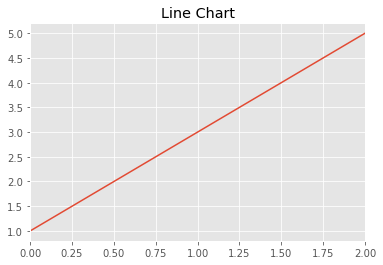

In [87]:
# example of Series#plot()
tmp_series = pd.Series([1,3,5])
ax = tmp_series.plot()
ax.set_title('Line Chart')
plt.show()

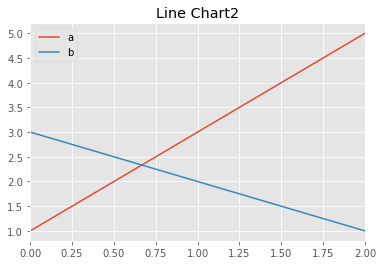

In [88]:
# example of DataFrame#plot()
tmp_df = pd.DataFrame({'a': [1,3,5], 'b': [3,2,1]})
ax = tmp_df.plot()
ax.set_title('Line Chart2')
plt.show()

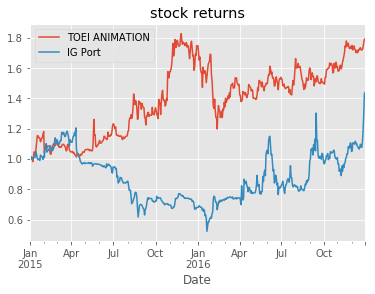

In [89]:
# Line Chart
ax = anime_stock_returns_df.plot()
ax.set_title('stock returns')
plt.show()

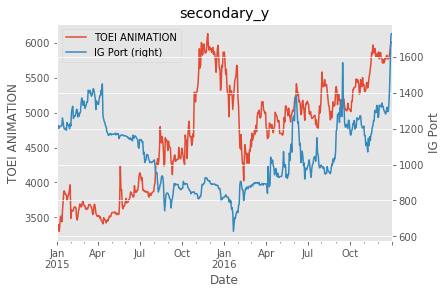

In [90]:
# Y軸の範囲が異なる場合
ax = stock_df.plot(secondary_y=['IG Port'])
ax.set_title('secondary_y')
ax.set_ylabel('TOEI ANIMATION')
ax.right_ax.set_ylabel('IG Port')
plt.show()

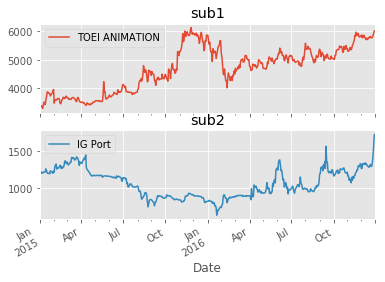

In [91]:
# 複数の図に分割する場合
ax1, ax2 = stock_df.plot(subplots=True)
ax1.set_title('sub1')
ax2.set_title('sub2')
plt.show()

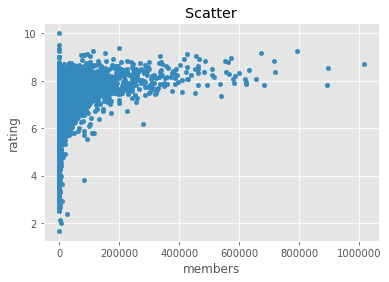

In [92]:
# 散布図を作成する
ax = anime_master_dataframe.plot.scatter(x='members',y='rating')
ax.set_title('Scatter')
plt.show()

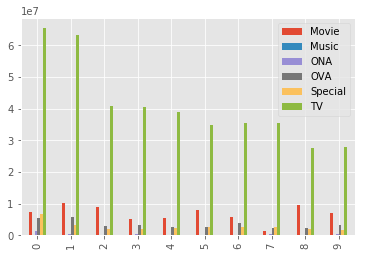

In [93]:
# 棒グラフを作成する
ax = anime_genre_top10_pivoted_df.plot.bar()
plt.show()

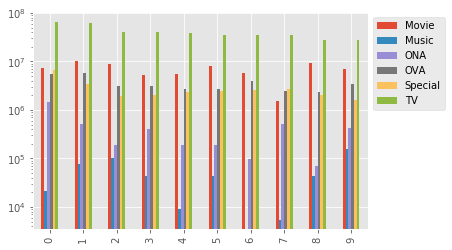

In [94]:
# 棒グラフ(対数軸)を作成する
ax = anime_genre_top10_pivoted_df.plot.bar(logy=True)
ax.legend(bbox_to_anchor=(1,1))
plt.show()

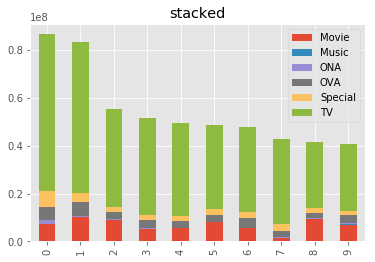

In [95]:
# 棒グラフ(積み上げ)を作成する
ax = anime_genre_top10_pivoted_df.plot.bar(stacked=True)
ax.set_title('stacked')
plt.show()

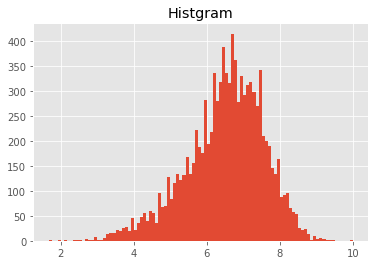

In [96]:
# ヒストグラムを作成する
ax = anime_master_dataframe['rating'].hist(bins=100)
ax.set_title('Histgram')
plt.show()

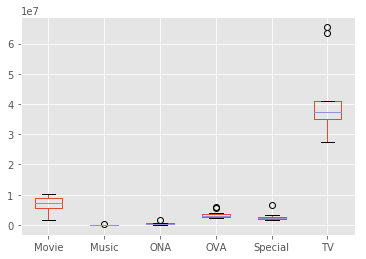

In [97]:
# 箱ひげ図を作成する
anime_genre_top10_pivoted_df.plot.box()
ax.set_title('Box Plot')
plt.show()

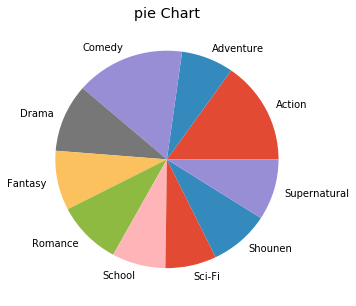

In [98]:
# 円グラフを作成する
ax = anime_genre_top10_df.groupby('genre').sum()['members'].plot.pie(figsize=(5,5))
ax.set_title('pie Chart')
ax.set_ylabel('')
plt.show()